# Machine Learning 2024-2025 - UMONS

# Classification

In this lab we will experiment with multi-class classification. We will consider several models.
We will be using the [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset, which contains several attributes of white wines.
Each observation is associated to a rating between $0$ and $10$ that will be the label of our classification task.

The columns of the dataframe contain the following information:
* `fixed_acidity`: amount of tartaric acid in $\text{g}/\text{dm}^3$,
* `volatile_acidity`: amount of acetic acid in $\text{g}/\text{dm}^3$,
* `citric_acid`: amount of citric acid in $\text{g}/\text{dm}^3$,
* `residual_sugar`: amount of remaining sugar after fermentation stops in $\text{g}/\text{l}$,
* `chlorides`: amount of salt in wine,
* `free_sulfur_dioxide`: amount of free $\text{SO}_2$,
* `total_sulfur_dioxide`: amount of free and bound forms of $\text{SO}_2$,
* `density`: density of the wine,
* `pH`: pH level of the wine on a scale from $0$ to $14$,
* `sulphates`: amount of sulphates,
* `alcohol`: the percent of alcohol content,
* `quality`: quality of the wine (score between $0$ and $10$).

**Import the necessary libraries.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, log_loss, classification_report)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import warnings

np.random.seed(0)

**We load the dataset `wine.csv`.**

In [3]:
df = pd.read_csv('data/wine.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**1) Check the properties of this dataset (length, types, missing values).** 

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Data splitting

**We predict the target `quality` from all other features. We split the dataset into a training and test set following a $80/20$ partition.**

In [6]:
ylabel = 'quality'
X = df.drop(ylabel, axis=1)
y = df[ylabel]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

## Data exploration

**2) Look at the distribution of the variable `quality` in the training set using `sns.countplot`.**

<Axes: xlabel='quality', ylabel='count'>

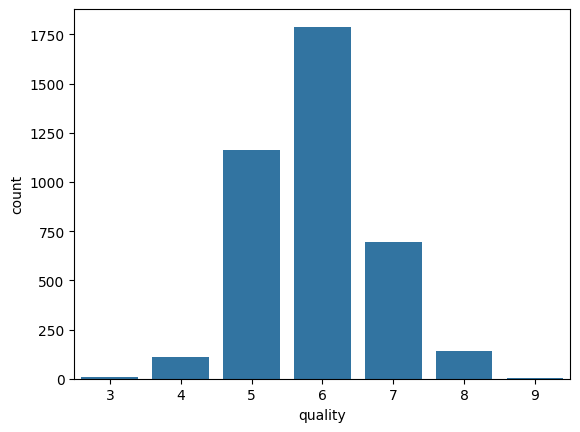

In [15]:
sns.countplot(x=y_train)

**3) For each continuous feature, we plot a boxplot of this feature grouped by label values. Use the `sns.boxenplot` function of the `seaborn` library. Which features seem to be the most useful to predict the label `quality`?**

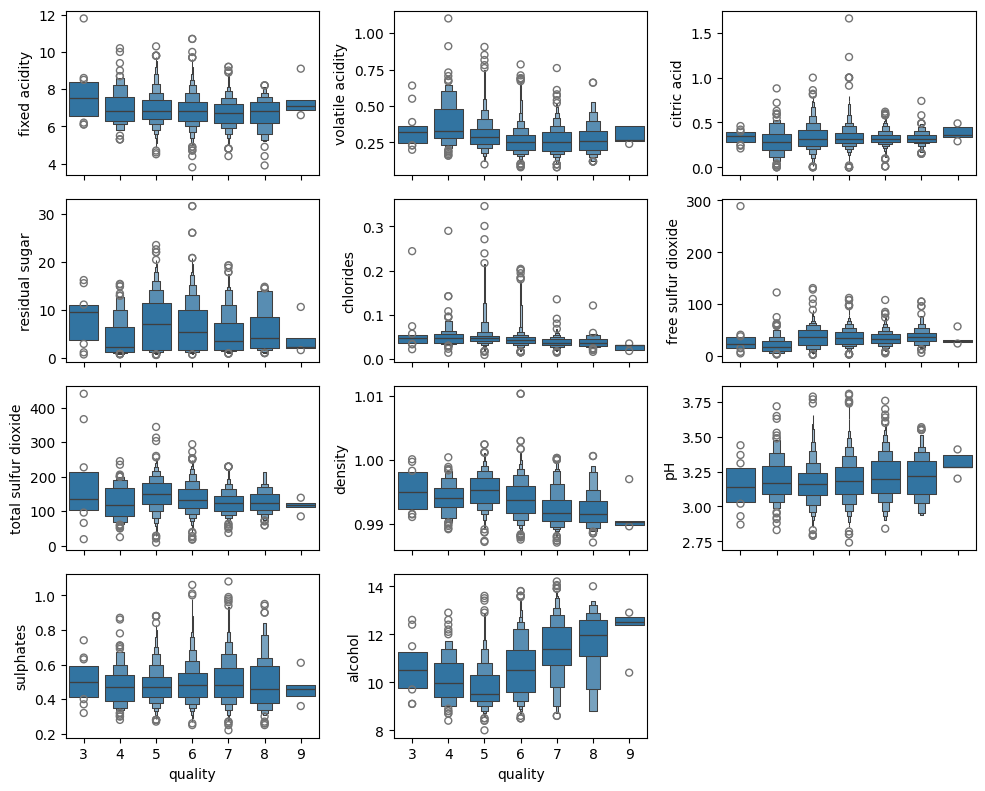

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(10, 8), sharex=True)
axes = axes.flatten()
for column, axis in zip(X_train.columns, axes):
    sns.boxenplot(x=y_train, y=X_train[column], ax=axis)
axes[-1].set_visible(False)
fig.tight_layout()

Je pense que c'est le total ``residual sugar`` , ``alcohol`` , ``density`` sont des features assez intérrésant vu que leur boxplot varient le plus , cela retourne de l'info sur ``quality``

**4) Plot the pairwise relationship of the most useful features using the function `sns.pairplot`. Plot a different color according to the value of the variable `quality` using the `hue` parameter. What do you observe?**

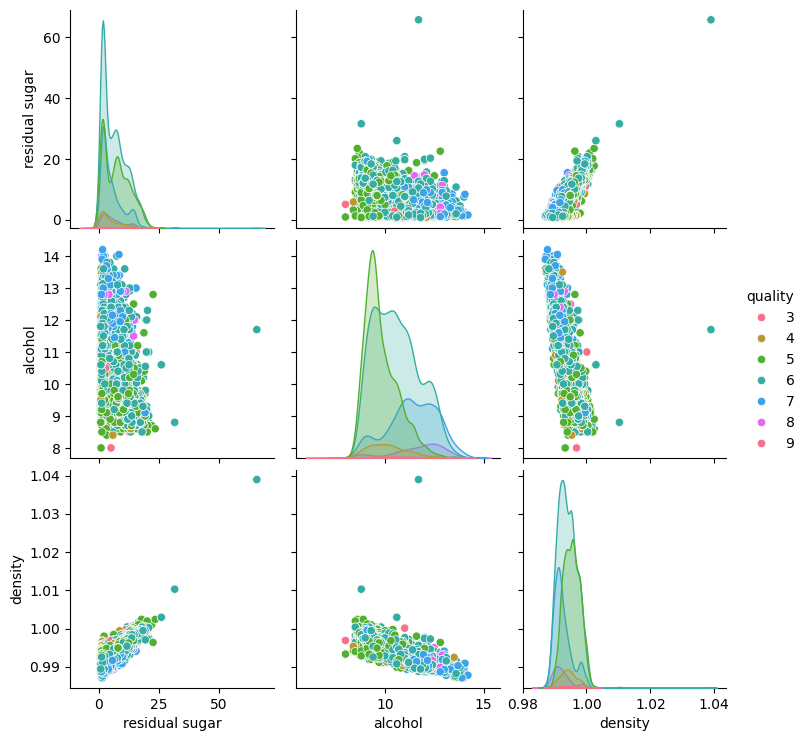

In [17]:
sns.pairplot(data=df , vars=['residual sugar', 'alcohol','density'], hue='quality', palette='husl')

## Classification metrics

**5) Define a simple pipeline where you first scale the data with `StandardScaler` to have zero mean and unit variance followed by a (linear) logistic regression. Then, fit the model.**

In [26]:
cls = make_pipeline(StandardScaler(), LogisticRegression())
cls.fit(X_train,y_train)

c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

**6) One of the most useful tools to diagnose a classification model is the confusion matrix. Print it using `confusion_matrix` and `ConfusionMatrixDisplay`.**

The size of the matrix is $n \times n$, where $n$ is the number of classes. Each row represents the instances in an actual class, while each column represents the instances in a predicted class. A cell $i, j$ represents the number of instances of class $i$ that were predicted as class $j$.

[[  0   0   5   3   1   0   0]
 [  0   5  26  19   1   0   0]
 [  0   0 135 160   0   0   0]
 [  0   1  67 324  16   0   1]
 [  0   0   9 133  41   0   0]
 [  0   0   0  27   6   0   0]
 [  0   0   0   0   0   0   0]]


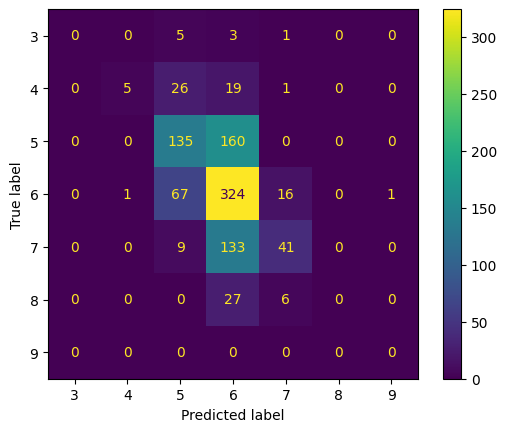

In [38]:
train_predictions , test_predictions = cls.predict(X_train) , cls.predict(X_test)
cm = confusion_matrix(y_pred=test_predictions, y_true=y_test, labels=cls.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
disp.plot()

**7) From the confusion matrix, several performance metrics can be calculated for each class, as well as overall metrics. Using the function `classification_report`, generate a report of these different metrics. Use the argument `zero_division=0` to avoid warnings.**

Here is what each of these terms represents:

1. **Precision** (also known as *positive predicted value*): This is the ratio of correctly predicted positive observations to the total predicted positives. It is an indicator of the accuracy of the positive predictions. For class $i$, precision is calculated as
   $$
   \text{Precision}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FP}_i},
   $$
   where $\text{TP}_i$ are the true positives for class $i$ and $\text{FP}_i$ are the false positives for class $i$.

2. **Recall** (also known as *sensitivity* or *true positive rate*): This is the ratio of correctly predicted positive observations to all observations in the actual class. It shows how well the model can find all the positive samples. For class $i$, recall is calculated as
   $$
   \text{Recall}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i},
   $$
   where $\text{FN}_i$ are the false negatives for class $i$.

3. **$F_1$ Score**: This is the harmonic mean of precision and recall. Therefore, this score takes both false positives and false negatives into account. It is particularly useful when the class distribution is uneven. $F_1$ score is calculated as
   $$
   \text{$F_1$ Score}_i = \frac{2}{\frac{1}{\text{Precision}_i} + \frac{1}{\text{Recall}_i}} = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i},
   $$
   and is between $0$ and $1$ ($1$ means that all predictions are correct, and $0$ means that there is no correct prediction).

4. **Support**: This is the number of actual occurrences of the class in the specified dataset. It does not reflect the model's performance but is very useful for determining the significance of the classification metrics.

These metrics can be averaged to obtain:
- **Macro average**: This is the average of the precision, recall, and $F_1$ score without taking class imbalance into account. It treats all classes equally, regardless of their support.
- **Weighted average**: This averages the precision, recall, and $F_1$ score, weighted by the support for each class. This means that the influence of each class's score on the overall average is proportional to the number of instances of that class.

In [39]:
report = classification_report(y_pred=test_predictions , y_true=y_test , zero_division=0)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.83      0.10      0.18        51
           5       0.56      0.46      0.50       295
           6       0.49      0.79      0.60       409
           7       0.63      0.22      0.33       183
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         0

    accuracy                           0.52       980
   macro avg       0.36      0.22      0.23       980
weighted avg       0.53      0.52      0.47       980



### Cross-entropy

The **cross-entropy loss** (also called log loss) for a multi-class classification model is calculated as follows:
$$
\text{Cross-Entropy} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{ik} \log(p_{ik})
$$
where:
- $n$ is the total number of observations,
- $K$ is the number of classes,
- $y_{ik}$ is a binary indicator: $1$ if class label $k$ is the correct classification for observation $i$, and $0$ otherwise,
- $p_{ik}$ is the predicted probability that observation $i$ belongs to class $k$.

Remember from the course that $\argmin_{\theta \in \Theta} \mathbb{E}[-\log p(Y; \theta)] = \argmin_{\theta \in \Theta} \text{KL}(p_\theta, p)$.
Since the distribution that minimizes the KL divergence is the true distribution, the expectation of the cross-entropy will be minimized when the model always predicts the correct vector of probabilities.

**8) Predict probabilities using the `predict_proba` method of the logistic regression model. Then calculate the cross-entropy using the `log_loss` function.**

In [41]:
proba_predictions = cls.predict_proba(X_test)
print(f"proba_predictions = {proba_predictions}")
print("-"*90)
Log_loss = log_loss(y_test, proba_predictions, labels=cls.classes_)
print(f"Log_loss = {Log_loss} ")

proba_predictions = [[2.34316821e-03 1.26045411e-01 3.87560166e-01 ... 7.04173958e-02
  6.76629425e-03 2.34662311e-04]
 [2.05918744e-03 4.10145669e-02 4.96731082e-01 ... 3.83070960e-02
  5.65629712e-03 6.05552388e-06]
 [3.59402543e-04 6.58604203e-03 1.79417738e-01 ... 1.74715161e-01
  2.39684911e-02 6.72673739e-04]
 ...
 [3.99339026e-04 3.04509012e-02 4.43576395e-01 ... 6.08343293e-02
  4.68088307e-03 2.37567743e-04]
 [2.42366752e-03 8.82597328e-03 5.28233578e-01 ... 4.59121228e-02
  8.99060344e-03 5.44249165e-06]
 [2.10324233e-03 2.20531634e-01 7.09840186e-01 ... 3.22311277e-03
  5.54361904e-04 6.51500841e-06]]
------------------------------------------------------------------------------------------
Log_loss = 1.1814677208874795 


**9) Based on `y_test_binarized`, compute the cross-entropy manually and check that it corresponds to the previous log loss.**

In [42]:
lb = LabelBinarizer()
lb.fit(y_train)
y_test_binarized = lb.transform(y_test)
y_test_binarized.shape, y_test_binarized[:5]

((980, 7),
 array([[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0]]))

In [43]:
# Calcul manuel de la perte d'entropie croisée
n_samples = y_test_binarized.shape[0]
manual_log_loss = -np.sum(y_test_binarized * np.log(proba_predictions)) / n_samples

print(f"Manual Log Loss: {manual_log_loss}")
print(f"Previous Log Loss: {Log_loss}")

Manual Log Loss: 1.1814677208874795
Previous Log Loss: 1.1814677208874795


## Hyperparameter tuning

**10) We will now experiment with various models for classification. For each one of the following models, we design a grid of hyperparameters based on the corresponding scikit-learn documentation:**
- **[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**
- **[Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)**
- **[Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)**
- **[Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)**
- **[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** **(see also [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html))**
- **[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**
- **[Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)**

**Make sure you understand all parameters; we will discuss random forests and gradient boosting later.**

In [44]:
# K-nearest neighbors
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 10, 20, 50, 100], # K
    'clf__weights': ['uniform', 'distance'], # Whether to weigh the neighbors equally or by their distance, as in locally weighted regression
    'clf__p': [1, 2], # Norm 1 or norm 2, i.e., Manhattan or Euclidean distance
}

# Parametric naive Bayes assuming Gaussian distribution of the features.
# This is a very simple model, so we don't need to tune any hyperparameters.
param_grid_nb = {}

# Linear discriminant analysis (LDA)
param_grid_lda = {}

# Quadratic discriminant analysis (QDA)
# The parameter here is a regularization parameter that can be used to reduce overfitting, given that there are many parameters to learn.
param_grid_qda = {
    'clf__reg_param': [0, 0.1, 0.5, 1],
}

# In scikit-learn, logistic regression regularizes by default, so we need to specify the penalty and the regularization strength.
param_grid_lr = {
    'clf__penalty': ['l2'],
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__fit_intercept': [True, False],
}

# We additionally experiment with a logistic regression model with feature selection
param_grid_lr_skb = {
    'skb__k': [3, 5, 7, 9],
    'clf__penalty': ['l2'],
    'clf__fit_intercept': [True, False],
}

# Random forest
param_grid_rf = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient boosting
param_grid_gb = {
    'loss': ['log_loss'],
    'learning_rate': [0.02, 0.1, 0.5],
    'n_estimators': [100, 200, 300], # Number of boosting stages
    'criterion': ['friedman_mse', 'squared_error'], # Function to measure the quality of a split
    'max_depth': [None, 2, 5, 10],
}

## Model fitting

**11) For each one of these models, select the hyperparameters that give the lowest cross-entropy using the [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) class. We start by normalizing the data. Compute the accuracy and cross-entropy on the test dataset for the best hyperparameters (and store them in array).**

**Print the best hyperparameters corresponding to each model and plot a confusion matrix.**

In [46]:
knn = KNeighborsClassifier()
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

preprocessor = StandardScaler()
knn = Pipeline([('pre', preprocessor), ('clf', knn)])
nb = Pipeline([('pre', preprocessor), ('clf', nb)])
lda = Pipeline([('pre', preprocessor), ('clf', lda)])
qda = Pipeline([('pre', preprocessor), ('clf', qda)])
lr = Pipeline([('pre', preprocessor), ('clf', lr)])
lr_skb = Pipeline([('pre', preprocessor), ('skb', SelectKBest()), ('clf', LogisticRegression(max_iter=1000))])

default_grid_params = dict(n_iter=10, cv=5, n_jobs=4)

grids = {
    'KNN': RandomizedSearchCV(knn, param_grid_knn, scoring='neg_log_loss', **default_grid_params),
    'Naive Bayes': RandomizedSearchCV(nb, param_grid_nb, scoring='neg_log_loss', **default_grid_params),
    'Linear Discriminant Analysis': RandomizedSearchCV(lda, param_grid_lda, scoring='neg_log_loss', **default_grid_params),
    'Quadratic Discriminant Analysis': RandomizedSearchCV(lda, param_grid_lda, scoring='neg_log_loss', **default_grid_params),
    'Logistic Regression': RandomizedSearchCV(lr, param_grid_lr, scoring='neg_log_loss', **default_grid_params),
    'Logistic Regression with feature selection': RandomizedSearchCV(lr_skb, param_grid_lr_skb, scoring='neg_log_loss', **default_grid_params),
    'Random Forest': RandomizedSearchCV(rf, param_grid_rf, scoring='neg_log_loss', **default_grid_params),
    'Gradient Boosting': RandomizedSearchCV(gb, param_grid_gb, scoring='neg_log_loss', **default_grid_params),
}

In [47]:
best_par = {}
for model , clf in grids.items():
    search = clf.fit(X_train,y_train)
    best_par[model] = search.best_params_

c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\lance\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iter

**12) Create a pandas dataframe where each row corresponds to a model. The columns should correspond to the accuracy and log loss.**

In [ ]:
n_model = len(grids.keys())
result = {
    'accuracy': np.zeros(n_model),
    'log loss' : np.zeros(n_model)
}

for _ in model